<a href="https://colab.research.google.com/github/harshbansal7/profarm-dvh/blob/main/Ensemble_Methods_for_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crop Yield Prediction based on DecisionTreeRegression

#### Importing all required libraries and CSV Dataset

In [ ]:
import numpy as np
import pandas as pd # to make dataframes
import matplotlib.pyplot as plt # to visualize data (using plots)
import seaborn as sns # also for visualization
from sklearn import model_selection
from sklearn.model_selection import train_test_split # splitting data into test-train sections
from sklearn.tree import DecisionTreeRegressor # the actual Decision Maker
from sklearn import metrics # to calculate Accuracy of the Model

df = pd.read_csv('https://raw.githubusercontent.com/harshbansal7/profarm-dvh/main/Datasets%20and%20Notebooks/main2.csv') # importing dataset to a dataframe
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676425 entries, 0 to 676424
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             676425 non-null  object 
 1   District          676425 non-null  object 
 2   Crop              675458 non-null  object 
 3   Year              676425 non-null  object 
 4   Season            676425 non-null  object 
 5   Area              675458 non-null  float64
 6   Area Units        675458 non-null  object 
 7   Production        665684 non-null  float64
 8   Production Units  675458 non-null  object 
 9   Yield             675458 non-null  float64
dtypes: float64(3), object(7)
memory usage: 51.6+ MB


State                   35
District               709
Crop                    56
Year                    23
Season                   6
Area                 47390
Area Units               1
Production           67906
Production Units         3
Yield               193205
dtype: int64

#### Cleaning Data 

1. Removing Rows with any NaN entry.
2. Sorting data in Descending Order of Year for better understanding.
3. `Production, Production Units, Area, Area Units` colums were dropped.


In [ ]:
df = df.dropna()

In [ ]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665684 entries, 0 to 675507
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             665684 non-null  object 
 1   District          665684 non-null  object 
 2   Crop              665684 non-null  object 
 3   Year              665684 non-null  object 
 4   Season            665684 non-null  object 
 5   Area              665684 non-null  float64
 6   Area Units        665684 non-null  object 
 7   Production        665684 non-null  float64
 8   Production Units  665684 non-null  object 
 9   Yield             665684 non-null  float64
dtypes: float64(3), object(7)
memory usage: 55.9+ MB


State                   35
District               709
Crop                    56
Year                    23
Season                   6
Area                 47333
Area Units               1
Production           67906
Production Units         3
Yield               193205
dtype: int64

In [ ]:
df['Season'] = pd.Categorical(df['Season'], ordered = True)
print (df['Season'].cat.categories)

Index(['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter'], dtype='object')


In [ ]:
df

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
675503,West Bengal,PURBA BARDHAMAN,Wheat,2000-01,Rabi,6310.0,Hectare,15280.0,Tonnes,2.421553
675504,West Bengal,PURULIA,Wheat,1997-98,Rabi,1895.0,Hectare,2760.0,Tonnes,1.456464
675505,West Bengal,PURULIA,Wheat,1998-99,Rabi,3736.0,Hectare,5530.0,Tonnes,1.480193
675506,West Bengal,PURULIA,Wheat,1999-00,Rabi,2752.0,Hectare,6928.0,Tonnes,2.517442


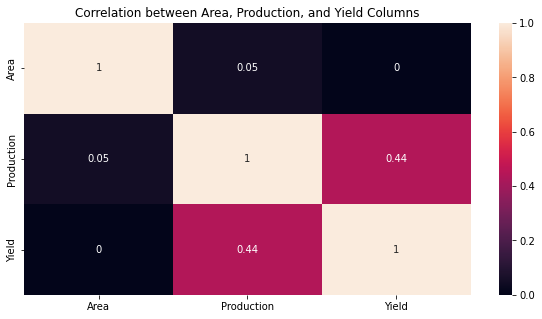

In [ ]:
import seaborn as sns
matrix = df.corr().round(2)
plt.figure(figsize =(10, 5))
sns.heatmap(matrix, annot=True)
plt.title('Correlation between Area, Production, and Yield Columns')
plt.savefig('corrplot.png')
plt.show()

In [ ]:
df = df.dropna()
df = df.sort_values(ascending=False, by='Year') 

df = df.drop('Area Units', axis=1)
df = df.drop('Production', axis=1)
df = df.drop('Production Units', axis=1)
df = df.drop('Area', axis=1)
df = df.drop('Year', axis=1)


# df = df[df['Year'].str.split('-').str[0].astype(int) >= 2010]

#### More Cleaning and handling String Entries (using Categories)

- Season cleaned up to remove disparities. 
- CSV Saved to have a Light Weight Dataset for quicker processing. 
- Converting `Year, State, Season, District, Crop` to Categorical Variables for better analysis.
- Printing Arrays of Categorical Entries for reference 

In [ ]:
# df = df.replace({'Season':{'Autumn':'Kharif','Summer':'Zaid','Winter':'Rabi'}})

df.to_csv('yield_cleaned_2.csv')

# df['Year'] = pd.Categorical(df['Year'], ordered = True)
df['State'] = pd.Categorical(df['State'], ordered = True)
df['District'] = pd.Categorical(df['District'], ordered = True)
df['Season'] = pd.Categorical(df['Season'], ordered = True)
df['Crop'] = pd.Categorical(df['Crop'], ordered = True)

# print (df['Year'].cat.categories)
print (df['State'].cat.categories)
print (df['District'].cat.categories)
print (df['Season'].cat.categories)
print (df['Crop'].cat.categories)

df

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')
Index(['24 PARAGANAS NORTH', '24 PARAGANAS SOUTH', 'ADILABAD', 'AGAR MALWA',
       'AGRA', 'AHMADABAD', 'AHMEDNAGAR', 'AIZAWL', 'AJMER', 'AKOLA',
       ...
       'WEST SIANG', 'WEST SINGHBHUM', 'WEST TRIPURA', 'WOKHA', 'YADADRI',
       'YADGIR', 'YAMUNANAGAR', 'YANAM', 'YAVATMAL', 'ZUNHEBOTO'],
      dtype='object', length=709)
Index(['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter'], dtype='object')
Ind

,State,District,Crop,Season,Yield
287384,Tamil Nadu,KARUR,Jowar,Rabi,0.407208
621290,Madhya Pradesh,REWA,Banana,Whole Year,35.300000
285525,Nagaland,DIMAPUR,Sesamum,Kharif,0.617691
285524,Nagaland,ZUNHEBOTO,Rice,Kharif,2.336540
621340,Madhya Pradesh,ANUPPUR,Coriander,Whole Year,1.800008
...,...,...,...,...,...
659314,Odisha,SAMBALPUR,Urad,Winter,0.261665
659313,Odisha,SAMBALPUR,Urad,Summer,0.571429
659312,Odisha,SAMBALPUR,Urad,Autumn,0.311966
333429,Uttar Pradesh,HARDOI,Small millets,Kharif,0.777778


#### Converting Categorical Columns to Integer Codes

In [ ]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df.to_csv('yield_processing_1.csv')

df

,State,District,Crop,Season,Yield
287384,29,325,21,2,0.407208
621290,18,544,3,4,35.300000
285525,23,173,44,1,0.617691
285524,23,708,41,1,2.336540
621340,18,29,10,4,1.800008
...,...,...,...,...,...
659314,24,561,53,5,0.261665
659313,24,561,53,3,0.571429
659312,24,561,53,0,0.311966
333429,32,244,45,1,0.777778


In [ ]:
df.nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665684 entries, 287384 to 321343
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   State     665684 non-null  int8   
 1   District  665684 non-null  int16  
 2   Crop      665684 non-null  int8   
 3   Season    665684 non-null  int8   
 4   Yield     665684 non-null  float64
dtypes: float64(1), int16(1), int8(3)
memory usage: 13.3 MB


#### Finally Dividing the Data into Two parts and doing the ML part

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def scores_print(name_of_regr, regr, x_test, y_test):
  y_pred = regr.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  print(name_of_regr + " MAE : {:.3f} | MSE : {:.3f} | R^2 Score : {:.5f}".format(mae, mse, r2))

In [ ]:
X = df.drop(columns=['Yield'], axis=1)
Y = df['Yield']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

r4 = DecisionTreeRegressor(max_depth = 7)

In [ ]:
r4.fit(X_train, Y_train)
scores_print('DTR', r4, X_test, Y_test)

DTR MAE : 25.307 | MSE : 113276.392 | R^2 Score : 0.86803


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaregr = AdaBoostRegressor(base_estimator = r4, random_state=42, n_estimators=10)
adaregr.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7),
                  n_estimators=10, random_state=42)

In [ ]:
scores_print('AdaBoostRegressor', adaregr, X_test, Y_test)

AdaBoostRegressor MAE : 29.354 | MSE : 144676.655 | R^2 Score : 0.83145


In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_regr = BaggingRegressor(base_estimator = r4, n_estimators=10, random_state=42)
bag_regr.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=7),
                 random_state=42)

In [ ]:
scores_print('Bagging Regressor with DT 10 Depth', bag_regr, X_test, Y_test)

Bagging Regressor with DT 10 Depth MAE : 24.904 | MSE : 109407.829 | R^2 Score : 0.87254


In [ ]:
from sklearn.ensemble import StackingRegressor

dtr7 = DecisionTreeRegressor(max_depth = 7)

estimators2 = [
    ('bag', bag_regr),
    ('adab', adaregr),
]

sregr2 = StackingRegressor(estimators2, final_estimator=dtr7)
sregr2.fit(X_train, Y_train)

StackingRegressor(estimators=[('bag',
                               BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=7),
                                                random_state=42)),
                              ('adab',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7),
                                                 n_estimators=10,
                                                 random_state=42))],
                  final_estimator=DecisionTreeRegressor(max_depth=7))

In [ ]:
scores_print('Stacking Regressor without DT Training', sregr2, X_train, Y_train)
scores_print('Stacking Regressor without DT', sregr2, X_test, Y_test)

Stacking Regressor without DT Training MAE : 25.832 | MSE : 127871.705 | R^2 Score : 0.85385
Stacking Regressor without DT MAE : 25.936 | MSE : 120813.152 | R^2 Score : 0.85925


In [ ]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for i in range(20):
    rn = DecisionTreeRegressor(max_depth=i+1)
    rn.fit(X_train, Y_train)
    y_pred = rn.predict(X_test)
    y_train_pred = rn.predict(X_train)
    r2 = r2_score(Y_test, y_pred)
    r2_train = r2_score(Y_train, y_train_pred)
    train_scores.append(r2_train)
    test_scores.append(r2)


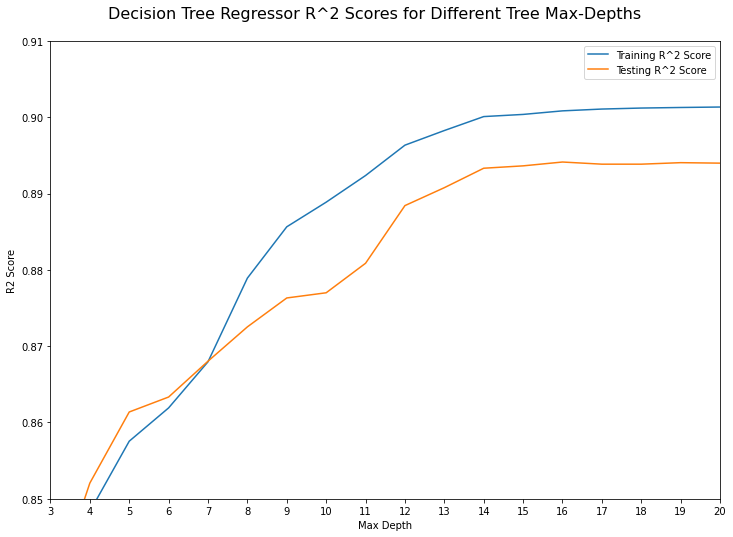

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
ax.plot(range(1, 21), train_scores, label='Training R^2 Score')
ax.plot(range(1, 21), test_scores, label='Testing R^2 Score')

# Set the x and y labels
ax.set_xlabel('Max Depth')
ax.set_ylabel('R2 Score')

# Set the plot title
fig.suptitle('Decision Tree Regressor R^2 Scores for Different Tree Max-Depths', fontsize=16)

# Set the legend
ax.legend()

# Set the x-axis ticks and limits
ax.set_xticks(range(1, 21, 1))
ax.set_xlim(3, 20)

# Set the y-axis limits
ax.set_ylim(0.85, 0.91)

# Adjust the margins to add padding between the title and the graph
fig.subplots_adjust(top=0.92)

# Save the plot to a file
plt.savefig('fitcheck.png', dpi=300)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

estimators2 = [
  ('bag', bag_regr),
  ('adab', adaregr),
]

for i in range(10):
  dtr7 = DecisionTreeRegressor(max_depth=i+1)
  sregr2 = StackingRegressor(estimators2, final_estimator=dtr7)
  sregr2.fit(X_train, Y_train)
  y_pred = sregr2.predict(X_test)
  y_train_pred = sregr2.predict(X_train)
  r2 = r2_score(Y_test, y_pred)
  r2_train = r2_score(Y_train, y_train_pred)
  train_scores.append(r2_train)
  test_scores.append(r2)

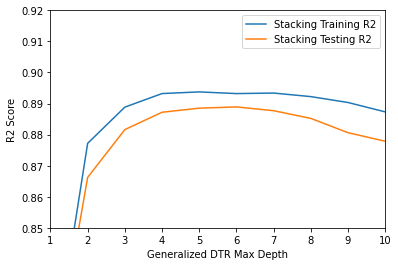

In [ ]:
plt.plot(range(1, 11), train_scores, label='Stacking Training R2')
plt.plot(range(1, 11), test_scores, label='Stacking Testing R2')
plt.xlabel('Generalized DTR Max Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.xticks(range(1, 11, 1))
plt.xlim(1, 10)  # Set y-axis limits
plt.ylim(0.85, 0.92)  # Set y-axis limits
plt.show()